# COVID-19 Prediction

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
%matplotlib inline

---

In [2]:
def logistic_model(x, a, b, c):
    return c / (1 + np.exp(-(x - b) / a))

In [3]:
def exponential_model(x,a,b,c):
    return a * np.exp(b * (x - c))

In [4]:
def getday(y, m, d, n):
    the_date = datetime(y, m, d)
    result_date = the_date + timedelta(days = n)
    d = result_date.strftime('%Y-%m-%d')
    return d

### Part 1: Data

In [5]:
data = pd.read_csv("wconfd.csv")

In [6]:
data

,Unnamed: 0,Date,中国,日本,泰国,韩国,美国,新加坡,越南,法国,...,马拉维,圣皮埃尔和密克隆,福克兰群岛（马尔维纳斯）,圣多美和普林西比,南苏丹,也门,科摩罗,塔吉克斯坦,莱索托,Total
0,0,2019-12-01,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,2019-12-02,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,2019-12-03,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3,2019-12-04,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4,2019-12-05,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,369,2020-12-04,94023,158402,4053,36332,14542044,58242,1361,2257331,...,6043,16,17,997,3154,2239,615,12308,2145,65813537
370,370,2020-12-05,94142,160906,4072,36915,14775308,58255,1365,2268552,...,6047,16,17,999,3154,2267,615,12349,2150,66486862
371,371,2020-12-06,94278,162941,4086,37546,14985142,58260,1366,2281475,...,6049,16,17,999,3166,2304,616,12428,2150,67107528
372,372,2020-12-07,94373,164446,4107,38161,15169648,58273,1367,2292497,...,6051,16,17,999,3181,2383,616,12469,2150,67644753


### Part 2: Total

In [7]:
data_whole = data.drop(columns = [_ for _ in data.columns if ((_ != "Date") and (_ != "Total"))])

In [8]:
data_whole

,Date,Total
0,2019-12-01,1
1,2019-12-02,1
2,2019-12-03,1
3,2019-12-04,1
4,2019-12-05,1
...,...,...
369,2020-12-04,65813537
370,2020-12-05,66486862
371,2020-12-06,67107528
372,2020-12-07,67644753


In [9]:
FMT ='%Y-%m-%d'
date = data_whole['Date']
data_whole['Date']= date.map(lambda x : (datetime.strptime(x, FMT) -datetime.strptime("2019-11-30", FMT)).days)

In [10]:
data_whole

,Date,Total
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
...,...,...
369,370,65813537
370,371,66486862
371,372,67107528
372,373,67644753


In [11]:
x = list(data_whole.iloc[:,0])
y = list(data_whole.iloc[:,1])
fit1 = curve_fit(logistic_model, x, y)
fit2 = curve_fit(exponential_model, x, y, maxfev = 10000)

In [12]:
fit1

(array([6.20414934e+01, 3.58675243e+02, 1.16859432e+08]),
 array([[7.33798877e-01, 2.94057051e+00, 2.83275817e+06],
        [2.94057051e+00, 1.33166896e+01, 1.30786982e+07],
        [2.83275817e+06, 1.30786982e+07, 1.29665125e+13]]))

In [13]:
fit2

(array([ 3.25913769e+02,  1.16162928e-02, -6.84999266e+02]),
 array([[ 8.50228301e+15, -3.87688431e+02,  2.24577021e+15],
        [-3.87689093e+02,  9.23471931e-09, -1.02402350e+02],
        [ 2.24577021e+15, -1.02402176e+02,  5.93191716e+14]]))

In [14]:
a1 = fit1[0][0]
b1 = fit1[0][1]
c1 = fit1[0][2]

In [15]:
a1

62.041493416387205

In [16]:
b1

358.6752427680521

In [17]:
c1

116859431.88947757

In [18]:
errors1= [np.sqrt(fit1[1][i][i]) for i in [0,1,2]]

In [19]:
errors1

[0.8566206143999792, 3.649203968144327, 3600904.403010505]

In [20]:
a2 = fit2[0][0]
b2 = fit2[0][1]
c2 = fit2[0][2]

In [21]:
a2

325.9137685058598

In [22]:
b2

0.01161629280479336

In [23]:
c2

-684.9992656994862

In [24]:
errors2= [np.sqrt(fit2[1][i][i]) for i in [0,1,2]]

In [25]:
errors2

[92207825.07928252, 9.609744694069741e-05, 24355527.417764146]

In [26]:
sol1 = int(fsolve(lambda x : logistic_model(x, a1, b1, c1) - int(c1), b1))

In [27]:
sol1

1518

In [28]:
endd1 = getday(2019, 12, 1, sol1)

In [29]:
endd1

'2024-01-27'

In [30]:
maxd1 = getday(2019, 12, 1, b1)

In [31]:
maxd1

'2020-11-23'

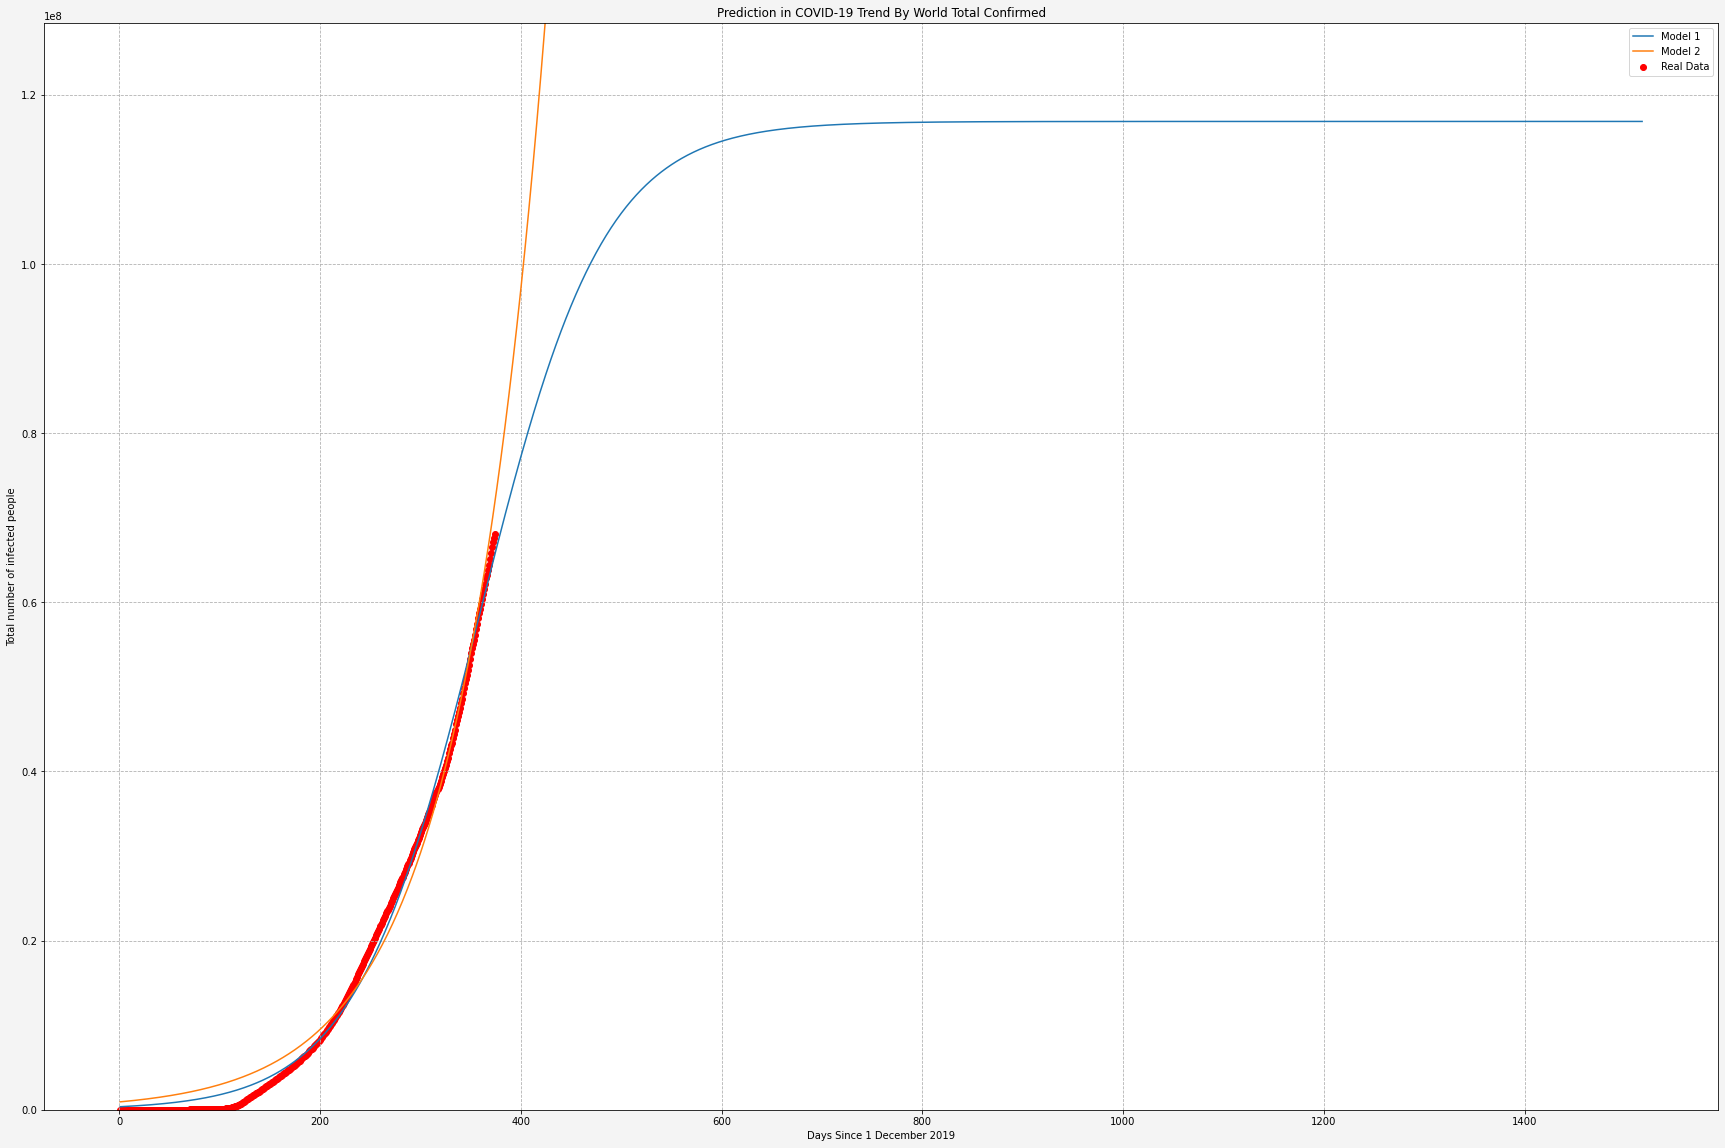

In [32]:
pred_x = list(range(max(x), sol1))
plt.figure('Prediction in COVID-19 Trend By World Total Confirmed', facecolor = "#f4f4f4", figsize = (30, 20))
plt.title('Prediction in COVID-19 Trend By World Total Confirmed')
plt.scatter(x, y, label = "Real Data", color = "red")
plt.plot(x + pred_x, [logistic_model(i, fit1[0][0], fit1[0][1], fit1[0][2]) for i in x + pred_x], label = "Model 1")
plt.plot(x + pred_x, [exponential_model(i, fit2[0][0], fit2[0][1], fit2[0][2])for i in x + pred_x], label="Model 2")
plt.legend(loc = 'best')
plt.grid(linestyle = '--')
plt.xlabel("Days Since 1 December 2019")
plt.ylabel("Total number of infected people")
plt.ylim((0, c1 * 1.1))
plt.show()

### Part 3: China

In [33]:
data_china = data.drop(columns = [_ for _ in data.columns if ((_ != "Date") and (_ != "中国"))])

In [34]:
data_china

,Date,中国
0,2019-12-01,1
1,2019-12-02,1
2,2019-12-03,1
3,2019-12-04,1
4,2019-12-05,1
...,...,...
369,2020-12-04,94023
370,2020-12-05,94142
371,2020-12-06,94278
372,2020-12-07,94373


In [35]:
FMT ='%Y-%m-%d'
date = data_china['Date']
data_china['Date']= date.map(lambda x : (datetime.strptime(x, FMT) -datetime.strptime("2019-11-30", FMT)).days)

In [36]:
data_china

,Date,中国
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
...,...,...
369,370,94023
370,371,94142
371,372,94278
372,373,94373


In [37]:
xchina = list(data_china.iloc[:,0])
ychina = list(data_china.iloc[:,1])
fit1china = curve_fit(logistic_model, xchina, ychina)
fit2china = curve_fit(exponential_model, xchina, ychina, maxfev = 10000)

In [38]:
fit1china

(array([5.41928967e+00, 7.14602939e+01, 8.73646024e+04]),
 array([[4.12693510e-02, 1.15886380e-03, 6.22727219e+00],
        [1.15886380e-03, 5.35679396e-02, 8.03236049e+00],
        [6.22727219e+00, 8.03236049e+00, 4.31626222e+04]]))

In [39]:
fit2china

(array([ 7.62505927e+02,  2.75093869e-03, -1.44639722e+03]),
 array([[-4.90212902e+18,  1.31014337e+05, -2.33701031e+18],
        [ 1.31014459e+05,  2.47390850e-08,  6.24590306e+04],
        [-2.33701031e+18,  6.24589728e+04, -1.11413167e+18]]))

In [40]:
a1china = fit1china[0][0]
b1china = fit1china[0][1]
c1china = fit1china[0][2]

In [41]:
a1china

5.419289667220296

In [42]:
b1china

71.46029385927714

In [43]:
c1china

87364.60243794275

In [44]:
errors1china = [np.sqrt(fit1china[1][i][i]) for i in [0,1,2]]

In [45]:
errors1china

[0.20314859340544453, 0.23144748780817365, 207.75616047139675]

In [46]:
a2china = fit2china[0][0]
b2china = fit2china[0][1]
c2china = fit2china[0][2]

In [47]:
a2china

762.5059272660075

In [48]:
b2china

0.0027509386883617227

In [49]:
c2china

-1446.3972185449713

In [50]:
errors2china= [np.sqrt(fit2china[1][i][i]) for i in [0,1,2]]

<ipython-input-50-5ea110f451d5>:1: RuntimeWarning: invalid value encountered in sqrt
  errors2china= [np.sqrt(fit2china[1][i][i]) for i in [0,1,2]]


In [51]:
errors2china

[nan, 0.000157286633367348, nan]

In [52]:
sol1china = int(fsolve(lambda x : logistic_model(x, a1china, b1china, c1china) - int(c1china), b1china))

In [53]:
sol1china

135

In [54]:
endd1china = getday(2019, 12, 1, sol1china)

In [55]:
endd1china

'2020-04-14'

In [56]:
maxd1china = getday(2019, 12, 1, b1china)

In [57]:
maxd1china

'2020-02-10'

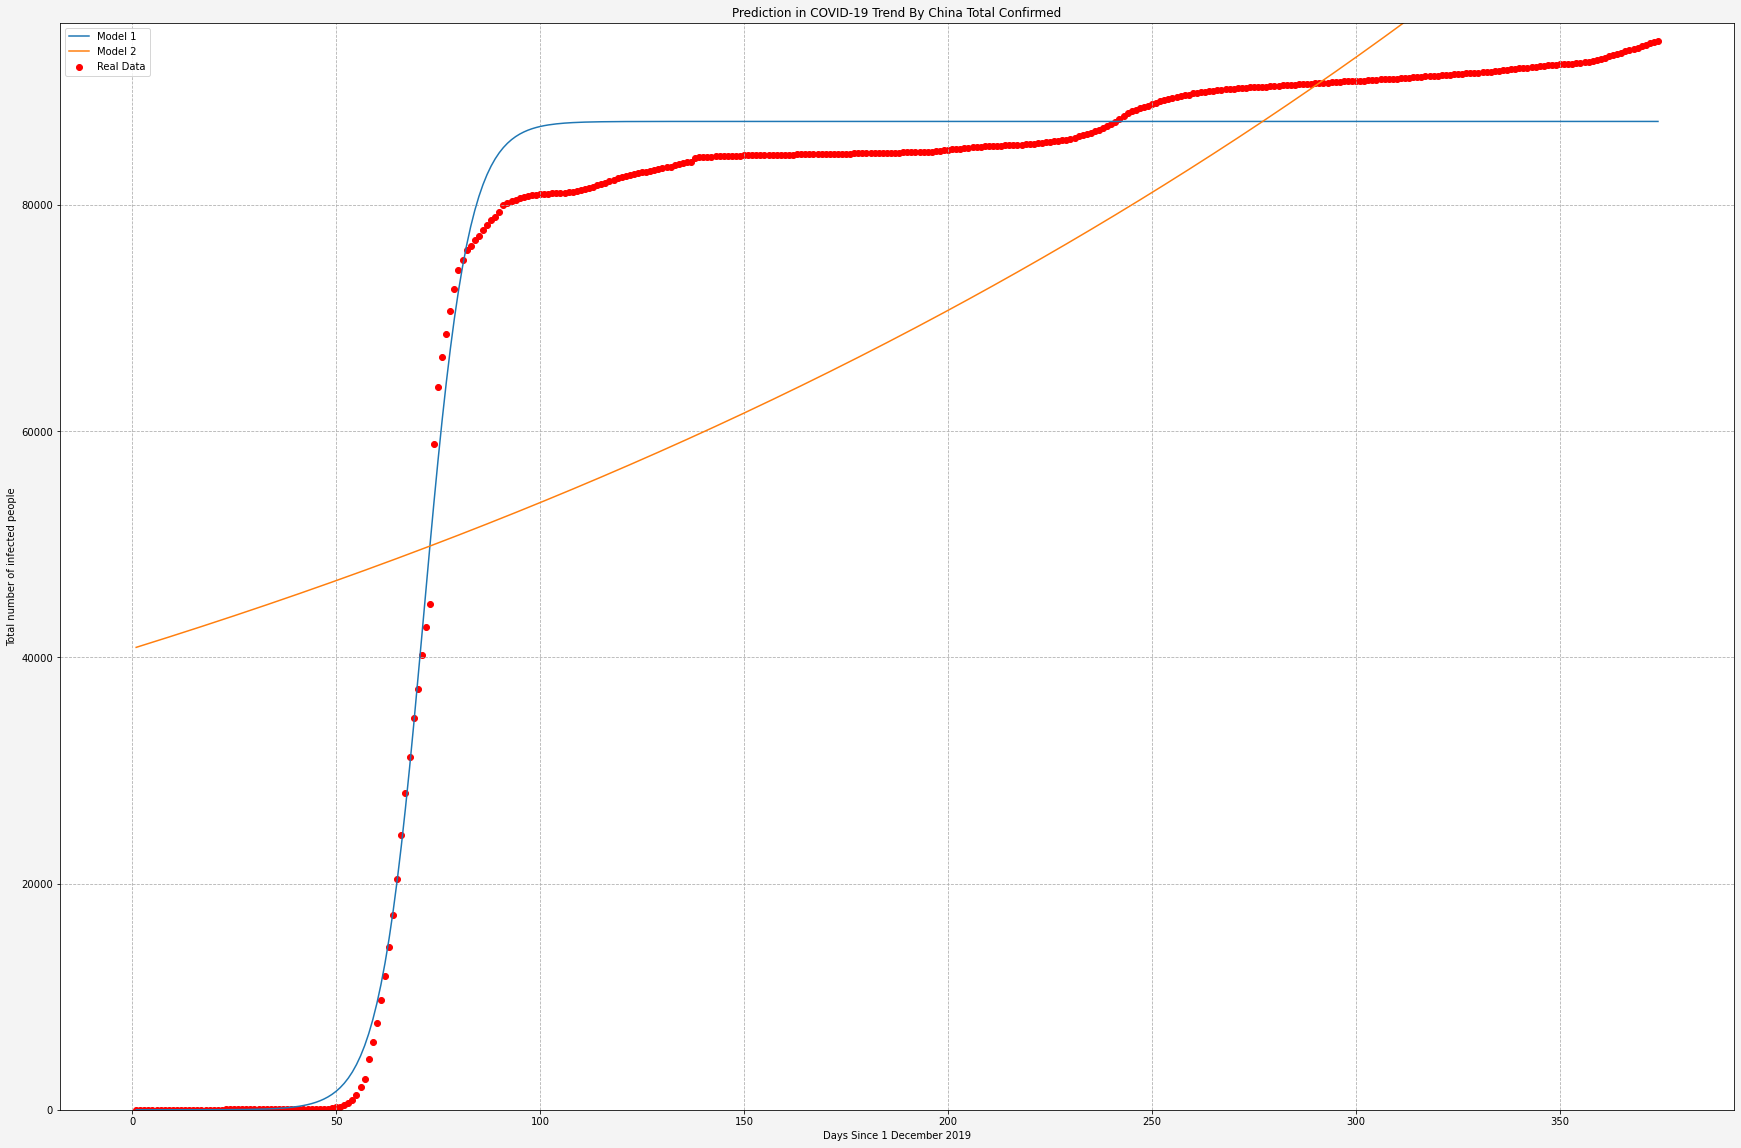

In [58]:
pred_xchina = list(range(max(xchina), sol1china))
plt.figure('Prediction in COVID-19 Trend By China Total Confirmed', facecolor = "#f4f4f4", figsize = (30, 20))
plt.title('Prediction in COVID-19 Trend By China Total Confirmed')
plt.scatter(xchina, ychina, label = "Real Data", color = "red")
plt.plot(xchina + pred_xchina, [logistic_model(i, fit1china[0][0], fit1china[0][1], fit1china[0][2]) for i in xchina + pred_xchina], label = "Model 1")
plt.plot(xchina + pred_xchina, [exponential_model(i, fit2china[0][0], fit2china[0][1], fit2china[0][2])for i in xchina + pred_xchina], label="Model 2")
plt.legend(loc = 'best')
plt.grid(linestyle = '--')
plt.xlabel("Days Since 1 December 2019")
plt.ylabel("Total number of infected people")
plt.ylim((0, c1china * 1.1))
plt.show()

### Part 4: U.S

In [59]:
data_us = data.drop(columns = [_ for _ in data.columns if ((_ != "Date") and (_ != "美国"))])
data_us = data_us[52: ]

In [60]:
data_us

,Date,美国
52,2020-01-22,1
53,2020-01-23,1
54,2020-01-24,2
55,2020-01-25,2
56,2020-01-26,3
...,...,...
369,2020-12-04,14542044
370,2020-12-05,14775308
371,2020-12-06,14985142
372,2020-12-07,15169648


In [61]:
FMT ='%Y-%m-%d'
date = data_us['Date']
data_us['Date']= date.map(lambda x : (datetime.strptime(x, FMT) -datetime.strptime("2020-01-21", FMT)).days)

In [62]:
data_us

,Date,美国
52,1,1
53,2,1
54,3,2
55,4,2
56,5,3
...,...,...
369,318,14542044
370,319,14775308
371,320,14985142
372,321,15169648


In [63]:
xus = list(data_us.iloc[:,0])
yus = list(data_us.iloc[:,1])
fit1us = curve_fit(logistic_model, xus, yus)
fit2us = curve_fit(exponential_model, xus, yus, maxfev = 10000)

In [64]:
fit1us

(array([7.24786535e+01, 3.23066271e+02, 2.77893387e+07]),
 array([[4.70023109e+00, 2.18873137e+01, 4.53507275e+06],
        [2.18873137e+01, 1.13036683e+02, 2.38821344e+07],
        [4.53507275e+06, 2.38821344e+07, 5.08339057e+12]]))

In [65]:
fit2us

(array([ 2.58718836e+02,  1.04715044e-02, -7.24642762e+02]),
 array([[2.37572784e+16, 1.13139566e+03, 8.76919217e+15],
        [1.13139913e+03, 1.56306387e-08, 4.17619038e+02],
        [8.76919217e+15, 4.17617756e+02, 3.23684936e+15]]))

In [66]:
a1us = fit1us[0][0]
b1us = fit1us[0][1]
c1us = fit1us[0][2]

In [67]:
a1us

72.47865349571742

In [68]:
b1us

323.0662706179788

In [69]:
c1us

27789338.671320513

In [70]:
errors1us = [np.sqrt(fit1us[1][i][i]) for i in [0,1,2]]

In [71]:
errors1us

[2.1680016356941283, 10.631871112241962, 2254637.570261596]

In [72]:
a2us = fit2us[0][0]
b2us = fit2us[0][1]
c2us = fit2us[0][2]

In [73]:
a2us

258.7188357832803

In [74]:
b2us

0.010471504365005775

In [75]:
c2us

-724.6427618959835

In [76]:
errors2us = [np.sqrt(fit2us[1][i][i]) for i in [0,1,2]]

In [77]:
errors2us

[154133962.4546852, 0.00012502255289445312, 56893315.56375145]

In [78]:
sol1us = int(fsolve(lambda x : logistic_model(x, a1us, b1us, c1us) - int(c1us), b1us))

In [79]:
sol1us

1594

In [80]:
endd1us = getday(2020, 1, 22, sol1us)

In [81]:
endd1us

'2024-06-03'

In [82]:
maxd1us = getday(2020, 1, 22, b1us)

In [83]:
maxd1us

'2020-12-10'

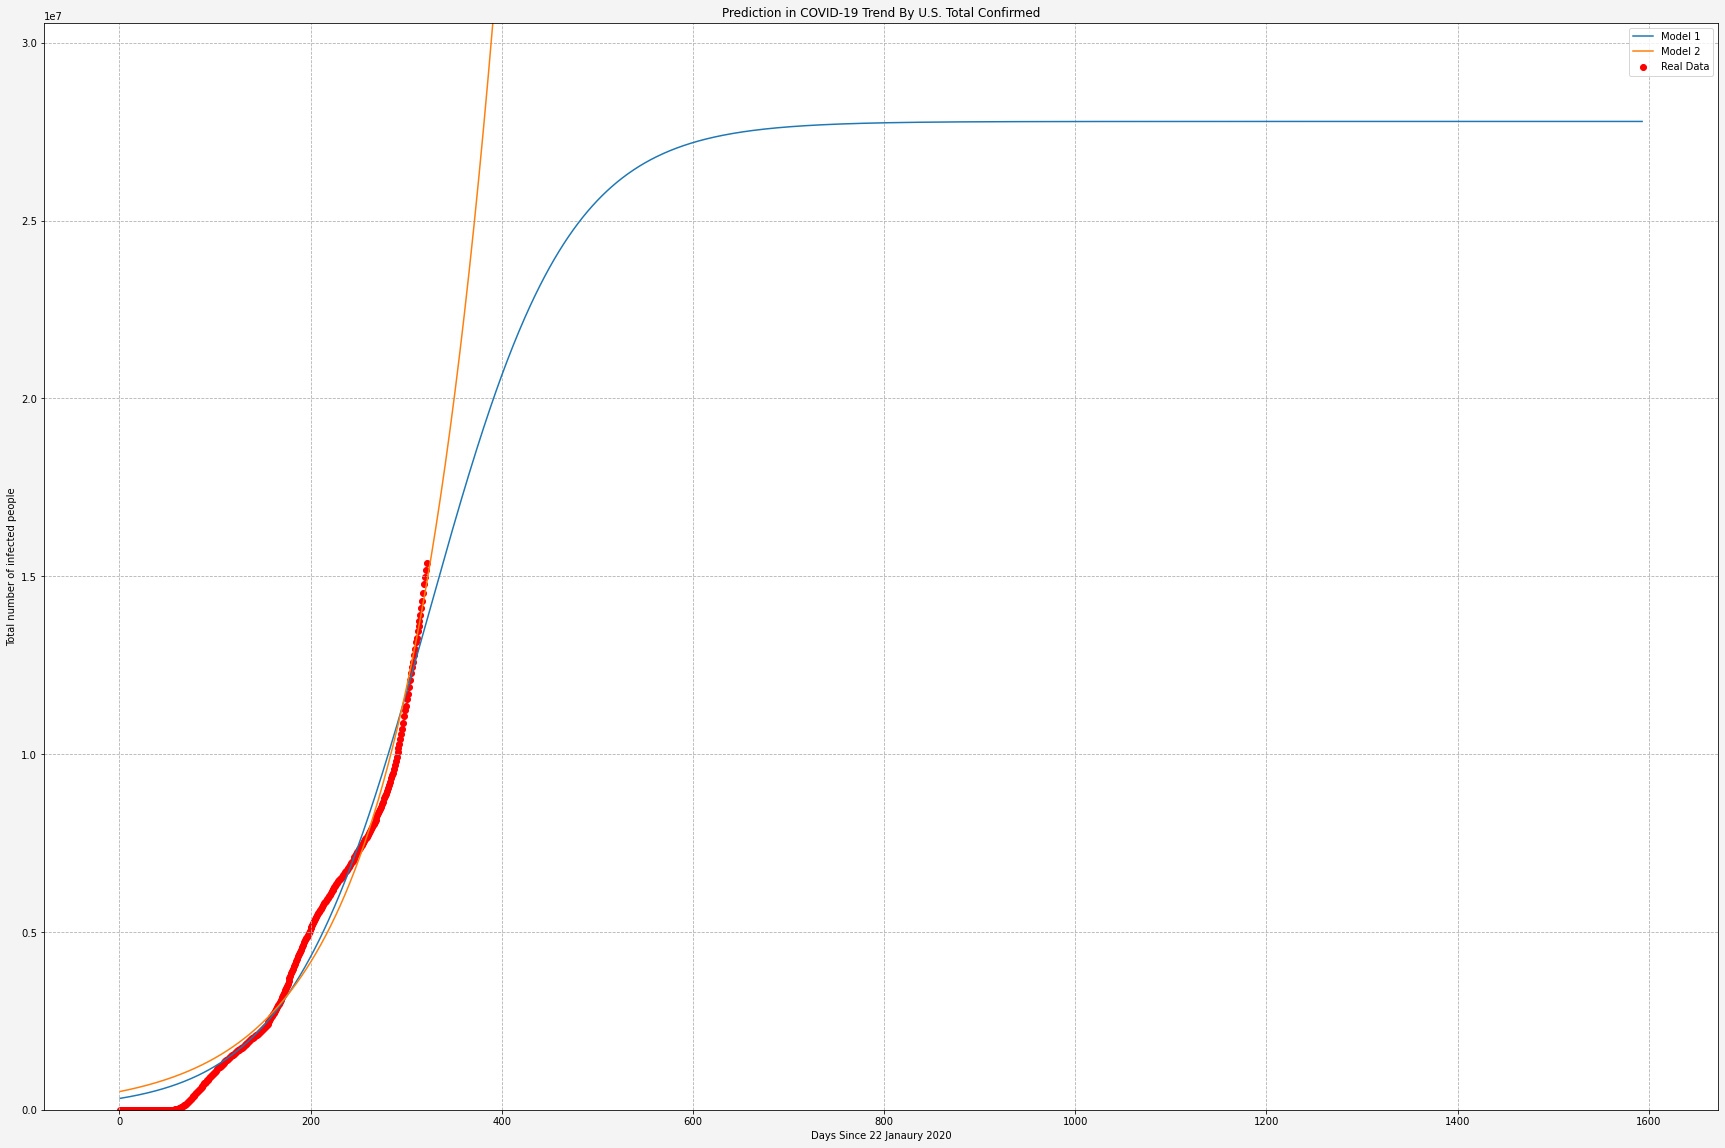

In [84]:
pred_xus = list(range(max(xus), sol1us))
plt.figure('Prediction in COVID-19 Trend By U.S. Total Confirmed', facecolor = "#f4f4f4", figsize = (30, 20))
plt.title('Prediction in COVID-19 Trend By U.S. Total Confirmed')
plt.scatter(xus, yus, label = "Real Data", color = "red")
plt.plot(xus + pred_xus, [logistic_model(i, fit1us[0][0], fit1us[0][1], fit1us[0][2]) for i in xus + pred_xus], label = "Model 1")
plt.plot(xus + pred_xus, [exponential_model(i, fit2us[0][0], fit2us[0][1], fit2us[0][2])for i in xus + pred_xus], label="Model 2")
plt.legend(loc = 'best')
plt.grid(linestyle = '--')
plt.xlabel("Days Since 22 Janaury 2020")
plt.ylabel("Total number of infected people")
plt.ylim((0, c1us * 1.1))
plt.show()

### Part 4: Brazil

In [85]:
data_bra = data.drop(columns = [_ for _ in data.columns if ((_ != "Date") and (_ != "巴西"))])
data_bra = data_bra[87: ]

In [86]:
data_bra

,Date,巴西
87,2020-02-26,1
88,2020-02-27,1
89,2020-02-28,1
90,2020-02-29,1
91,2020-03-01,2
...,...,...
369,2020-12-04,6487516
370,2020-12-05,6534951
371,2020-12-06,6577177
372,2020-12-07,6603540


In [87]:
FMT ='%Y-%m-%d'
date = data_bra['Date']
data_bra['Date']= date.map(lambda x : (datetime.strptime(x, FMT) -datetime.strptime("2020-02-25", FMT)).days)

In [88]:
data_bra

,Date,巴西
87,1,1
88,2,1
89,3,1
90,4,1
91,5,2
...,...,...
369,283,6487516
370,284,6534951
371,285,6577177
372,286,6603540


In [89]:
xbra = list(data_bra.iloc[:,0])
ybra = list(data_bra.iloc[:,1])
fit1bra = curve_fit(logistic_model, xbra, ybra)
fit2bra = curve_fit(exponential_model, xbra, ybra, maxfev = 10000)

In [90]:
fit1bra

(array([3.47651724e+01, 1.72269440e+02, 6.27637898e+06]),
 array([[2.41751858e-01, 2.26906377e-01, 1.44085425e+04],
        [2.26906377e-01, 4.94319024e-01, 2.34365896e+04],
        [1.44085425e+04, 2.34365896e+04, 1.49708818e+09]]))

In [91]:
fit2bra

(array([ 2.89169286e+02,  9.66469280e-03, -7.68391215e+02]),
 array([[ 1.35395044e+17, -2.81925518e+04,  4.82823707e+16],
        [-2.81925518e+04,  6.48527418e-08, -1.00535615e+04],
        [ 4.82823707e+16, -1.00535615e+04,  1.72176710e+16]]))

In [92]:
a1bra = fit1bra[0][0]
b1bra = fit1bra[0][1]
c1bra = fit1bra[0][2]

In [93]:
a1bra

34.76517242460728

In [94]:
b1bra

172.26944000731228

In [95]:
c1bra

6276378.976773942

In [96]:
errors1bra = [np.sqrt(fit1bra[1][i][i]) for i in [0,1,2]]

In [97]:
errors1bra

[0.49168268041337004, 0.7030782491841059, 38692.223730275575]

In [98]:
a2bra = fit2bra[0][0]
b2bra = fit2bra[0][1]
c2bra = fit2bra[0][2]

In [99]:
a2bra

289.1692856802

In [100]:
b2bra

0.009664692804057627

In [101]:
c2bra

-768.391214920479

In [102]:
errors2bra = [np.sqrt(fit2bra[1][i][i]) for i in [0,1,2]]

In [103]:
errors2bra

[367960655.11380607, 0.0002546620148060311, 131216123.21374641]

In [104]:
sol1bra = int(fsolve(lambda x : logistic_model(x, a1bra, b1bra, c1bra) - int(c1bra), b1bra))

In [105]:
sol1bra

717

In [106]:
endd1bra = getday(2020, 2, 26, sol1bra)

In [107]:
endd1bra

'2022-02-12'

In [108]:
maxd1bra = getday(2020, 2, 26, b1bra)

In [109]:
maxd1bra

'2020-08-16'

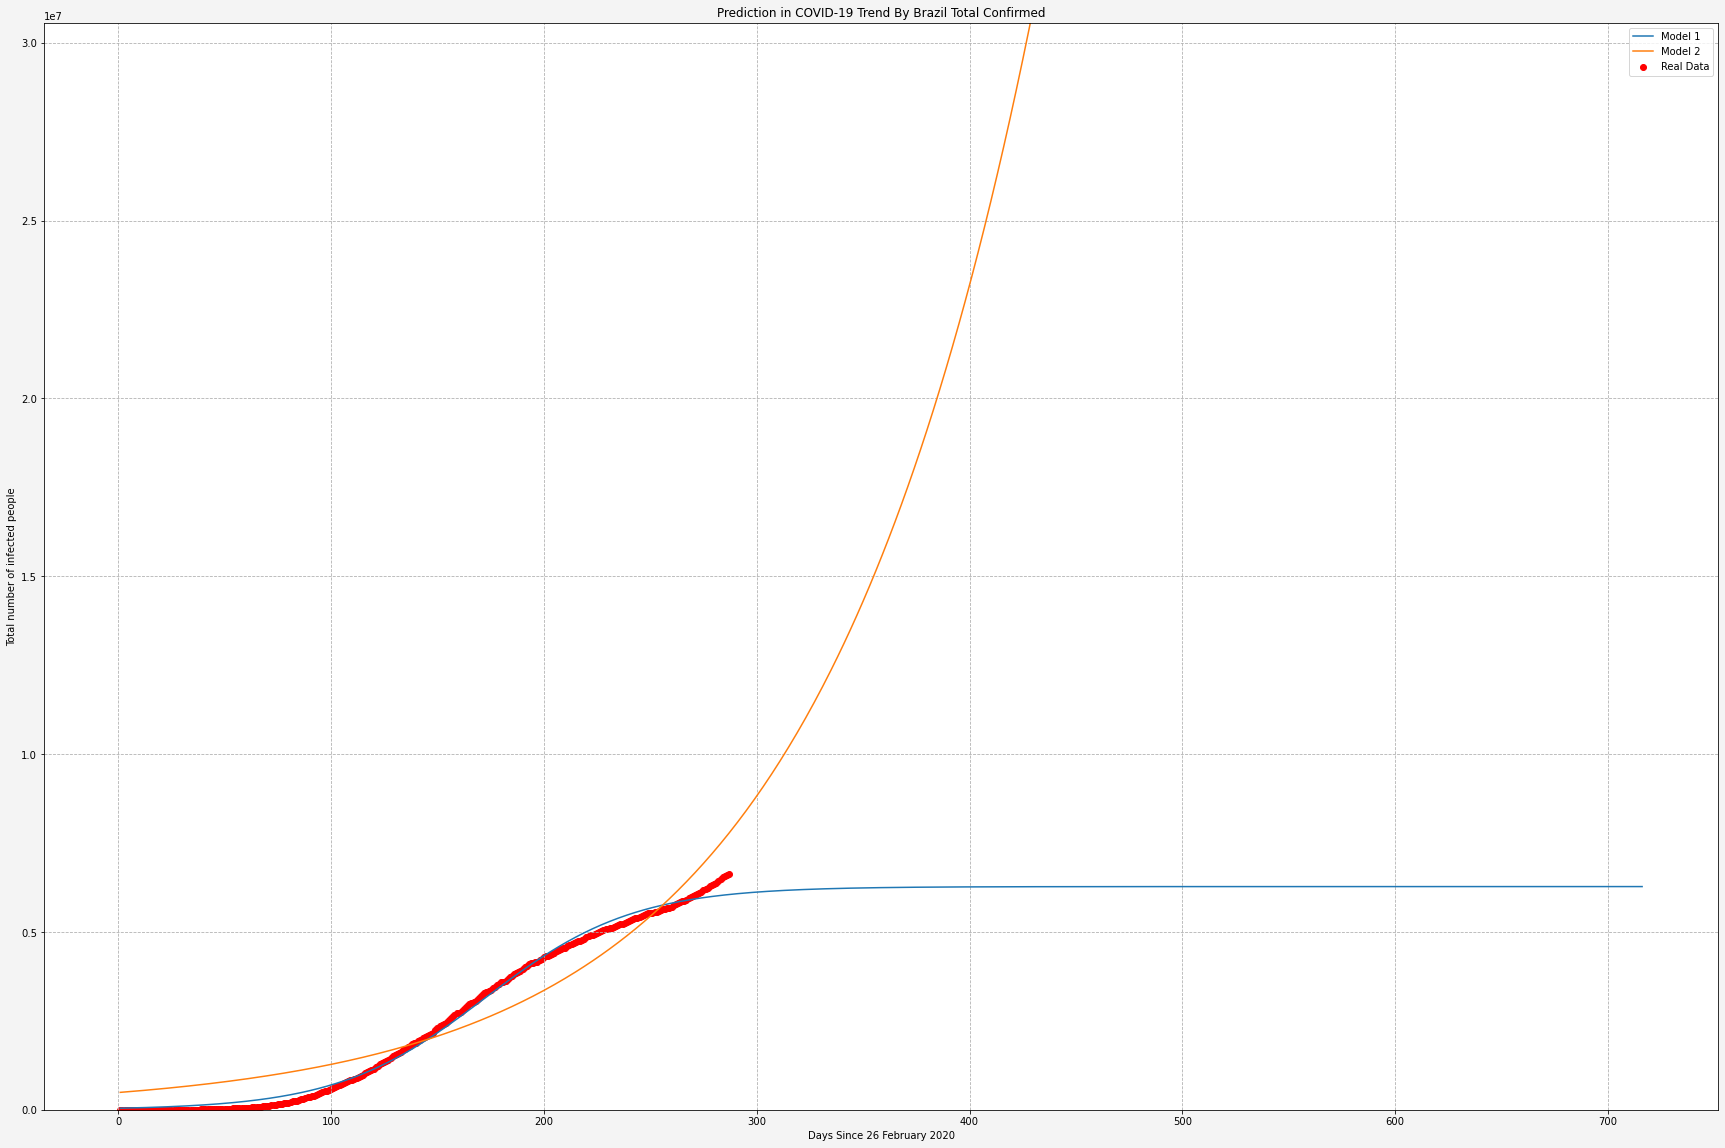

In [110]:
pred_xbra = list(range(max(xbra), sol1bra))
plt.figure('Prediction in COVID-19 Trend By Brazil Total Confirmed', facecolor = "#f4f4f4", figsize = (30, 20))
plt.title('Prediction in COVID-19 Trend By Brazil Total Confirmed')
plt.scatter(xbra, ybra, label = "Real Data", color = "red")
plt.plot(xbra + pred_xbra, [logistic_model(i, fit1bra[0][0], fit1bra[0][1], fit1bra[0][2]) for i in xbra + pred_xbra], label = "Model 1")
plt.plot(xbra + pred_xbra, [exponential_model(i, fit2bra[0][0], fit2bra[0][1], fit2bra[0][2])for i in xbra + pred_xbra], label="Model 2")
plt.legend(loc = 'best')
plt.grid(linestyle = '--')
plt.xlabel("Days Since 26 February 2020")
plt.ylabel("Total number of infected people")
plt.ylim((0, c1us * 1.1))
plt.show()